<a href="https://colab.research.google.com/github/hasmita-patnana7/EDA_THEORY_DA/blob/main/EDA_theory_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load and Explore the Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/content/GSS7402.csv")

In [3]:
df.head()

,rownames,kids,age,education,year,siblings,agefirstbirth,ethnicity,city16,lowincome16,immigrant
0,1,0,25,14,2002,1,NaN,cauc,no,no,no
1,2,1,30,13,2002,4,19.0,cauc,yes,no,no
2,3,1,55,2,2002,1,27.0,cauc,no,no,yes
3,4,2,57,16,2002,1,22.0,cauc,no,no,no
4,5,2,71,12,2002,6,29.0,cauc,yes,no,no


In [2]:
# Dimension and Summary
print("Dimensions:", df.shape)
print("Column Names:", df.columns)
print("Data Types:\n", df.dtypes)
print("Summary:\n", df.describe(include='all'))

Dimensions: (9120, 11)
Column Names: Index(['rownames', 'kids', 'age', 'education', 'year', 'siblings',
       'agefirstbirth', 'ethnicity', 'city16', 'lowincome16', 'immigrant'],
      dtype='object')
Data Types:
 rownames           int64
kids               int64
age                int64
education          int64
year               int64
siblings           int64
agefirstbirth    float64
ethnicity         object
city16            object
lowincome16       object
immigrant         object
dtype: object
Summary:
            rownames         kids          age    education         year  \
count   9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean    4560.500000     2.076096    46.082018    12.635088  1990.288596   
std     2632.861561     1.805099    

## Module 2: Data Transformation

In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Replace missing values in 'agefirstbirth' with mean or median
df['agefirstbirth'].fillna(df['agefirstbirth'].mean(), inplace=True)

<ipython-input-5-135a6b81b4e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agefirstbirth'].fillna(df['agefirstbirth'].mean(), inplace=True)


In [6]:
# Discretization example
df['age_category'] = pd.cut(df['age'], bins=[0, 18, 35, 50, np.inf], labels=["Youth", "Adult", "Middle-aged", "Senior"])

## Module 3: Correlation Analysis & Time Series Analysis

In [10]:
# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculating correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               rownames      kids       age  education      year  siblings  \
rownames       1.000000 -0.026055  0.020865   0.056074  0.238945 -0.002408   
kids          -0.026055  1.000000  0.325692  -0.290511 -0.082678  0.180015   
age            0.020865  0.325692  1.000000  -0.241843  0.047835  0.109736   
education      0.056074 -0.290511 -0.241843   1.000000  0.212168 -0.290603   
year           0.238945 -0.082678  0.047835   0.212168  1.000000 -0.079253   
siblings      -0.002408  0.180015  0.109736  -0.290603 -0.079253  1.000000   
agefirstbirth -0.022933 -0.139055  0.056122   0.211600  0.002503 -0.071972   

               agefirstbirth  
rownames           -0.022933  
kids               -0.139055  
age                 0.056122  
education           0.211600  
year                0.002503  
siblings           -0.071972  
agefirstbirth       1.000000  


In [11]:
# Visualize the correlation matrix if needed
import seaborn as sns
import matplotlib.pyplot as plt

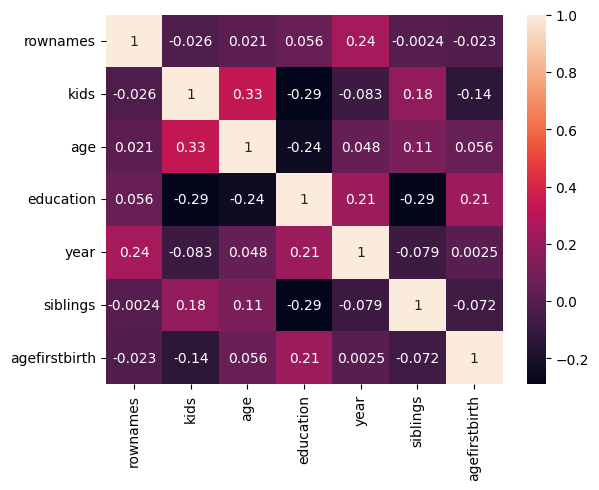

In [12]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Module 4: Data Summarization and Visualization

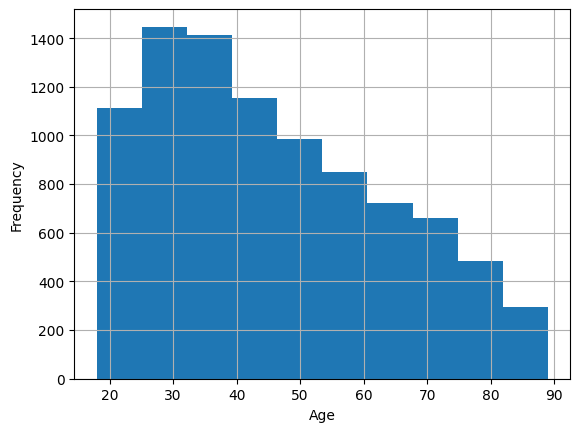

In [13]:
# Univariate analysis example
df['age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='age', ylabel='education'>

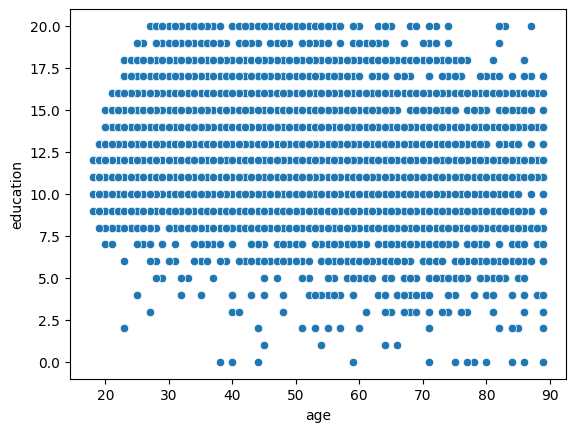

In [14]:
# Bivariate scatter plot
sns.scatterplot(x='age', y='education', data=df)

## Module 5: Clustering Analysis

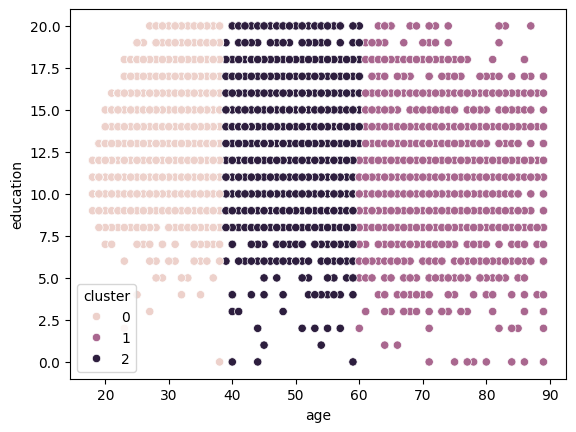

In [15]:
from sklearn.cluster import KMeans

# K-Means Clustering on age and education
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['age', 'education']])
sns.scatterplot(x='age', y='education', hue='cluster', data=df)
plt.show()

## Module 6: Dimensionality Reduction

<Axes: xlabel='PC1', ylabel='PC2'>

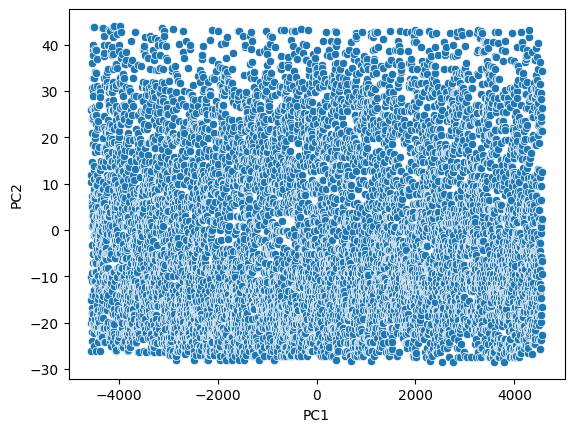

In [16]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.select_dtypes(include=[np.number]).dropna())
df['PC1'], df['PC2'] = principal_components[:, 0], principal_components[:, 1]
sns.scatterplot(x='PC1', y='PC2', data=df)

## Module 7: Model Development and Evaluation

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Linear Regression example
model = LinearRegression()
X = df[['age', 'education']].dropna()
y = df['agefirstbirth'].dropna()
model.fit(X, y)
predictions = model.predict(X)

In [18]:
# Evaluation
print("R² Score:", r2_score(y, predictions))
print("MAE:", mean_absolute_error(y, predictions))

R² Score: 0.057002398898927775
MAE: 1.699943522813088
